# Import CSV File

In [7]:
import pandas as pd
import requests
url = "https://query.data.world/s/kbp7qridgjgolm6zrohqkirqetjzeh"

r = requests.get(url, allow_redirects=True)

# Saving the file as a CSV file
open("big_foot_dataset.csv", "wb").write(r.content)

# Import Data
bigfoot_DF = pd.read_csv("big_foot_dataset.csv")

# Print Last 3 entries
bigfoot_DF[-3:]

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
5018,On the twenty sixth and again on the twenty se...,"head n.on highway 441 from Orlando,then go eas...",Lake County,Florida,Summer,NaN,NaN,NaN,NaN,30267.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5019,I was hunting on me and my neighbor's property...,It was on my neighbor's property in the woods ...,White County,Illinois,Fall,NaN,NaN,NaN,NaN,59058.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5020,I was riding with a friend in the summer of 19...,This happened on the Mississippi River Road in...,Calhoun County,Illinois,Summer,NaN,NaN,NaN,NaN,39827.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How many Big Foot sightings are recorded in this data set?

In [8]:
len(bigfoot_DF)

5021

Create a list of all the states where Big Foot sightings have been recorded

In [9]:
# Create array of the occurances of just states
states = bigfoot_DF["state"]
states[-3:]

5018     Florida
5019    Illinois
5020    Illinois
Name: state, dtype: object

Create a Counter object with all the occurances and counts of the states

In [10]:
# Count the amount of occurances per state
from collections import Counter

state_freq = Counter(states)

# Sort the array

sorted_state_freq = state_freq.most_common()

sorted_state_freq[:3] # Top 3 States 

[('Washington', 601), ('California', 417), ('Ohio', 303)]

# Graph the States

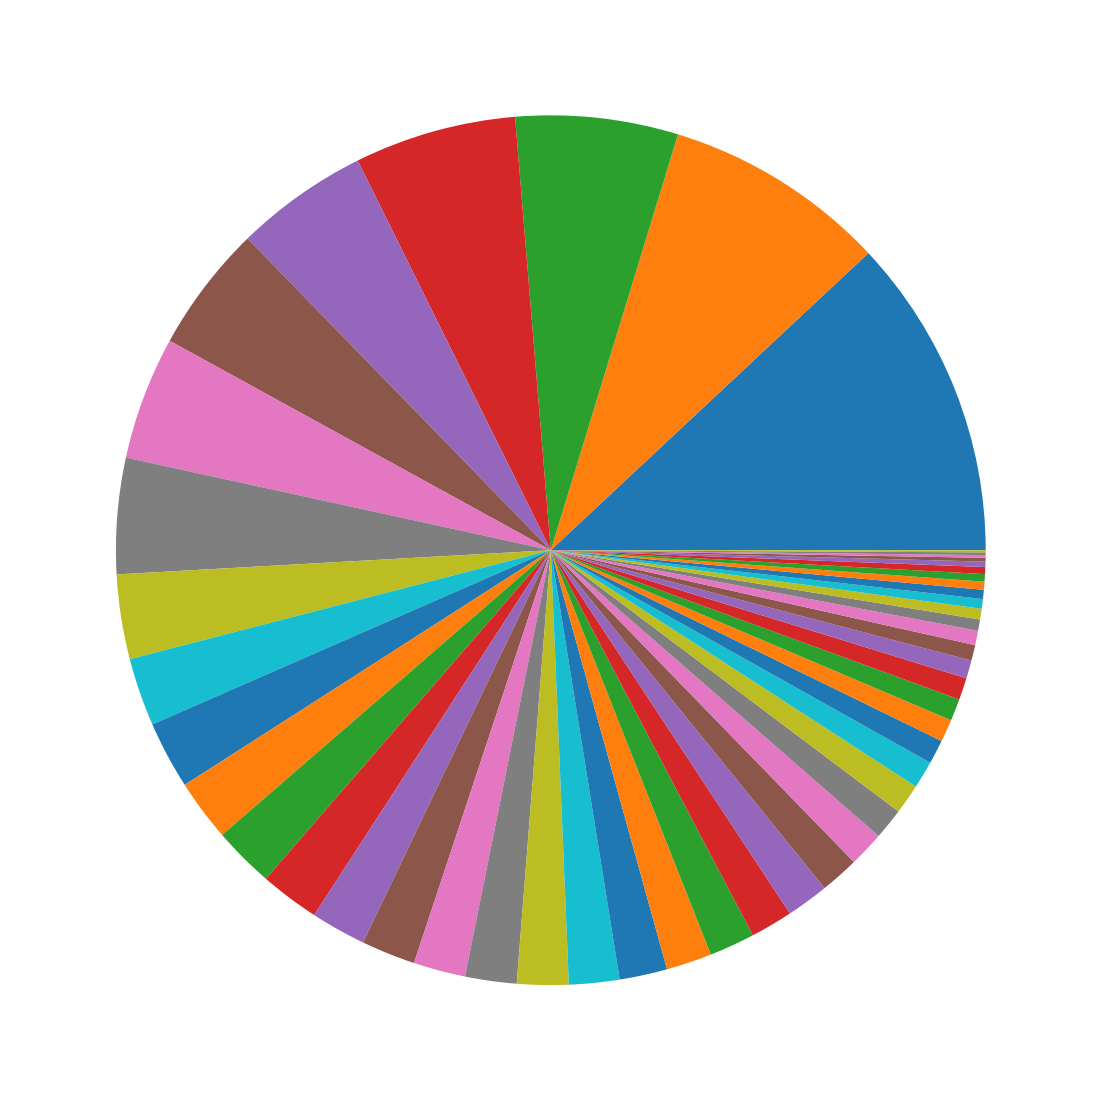

In [17]:
states = [] # Just states
freq_states = [] # Just the numbers of states

# Logic to append the date to their respective arrays
for entry in sorted_state_freq:
    states.append(entry[0])
    freq_states.append(entry[1])

import matplotlib.pyplot as plt


# Font of the States
font = {'weight': 'light','size': 10}

# Applying font to Graph
plt.rc('font', **font)

# Spacing out the Bars
width = []
for i in range(len(state_freq)):
    width.append(.5)

plt.pie(freq_states, labels=states, textprops={"color": "w"})
fig = plt.gcf()
fig.set_size_inches(20,20) # Makes Pie Chart Bigger
plt.show()

### Pie Chart Looks Ugly, adding an "Other" portion

In [18]:
states_shortened = states[:30]
state_freq_shortened = freq_states[:30]

states_shortened.append("Other")

sum = 0
for num in freq_states[30:len(freq_states)]:
    sum += num

state_freq_shortened.append(sum)

print(states_shortened, state_freq_shortened)

['Washington', 'California', 'Ohio', 'Florida', 'Oregon', 'Illinois', 'Texas', 'Michigan', 'Missouri', 'Colorado', 'Georgia', 'Pennsylvania', 'Kentucky', 'New York', 'West Virginia', 'Arkansas', 'Oklahoma', 'Tennessee', 'Idaho', 'Alabama', 'North Carolina', 'Wisconsin', 'Arizona', 'Virginia', 'Indiana', 'Minnesota', 'New Jersey', 'Utah', 'Iowa', 'Montana', 'Other'] [601, 417, 303, 302, 249, 237, 230, 216, 158, 127, 126, 115, 114, 111, 103, 101, 97, 96, 96, 94, 89, 85, 85, 79, 79, 72, 66, 58, 56, 51, 408]


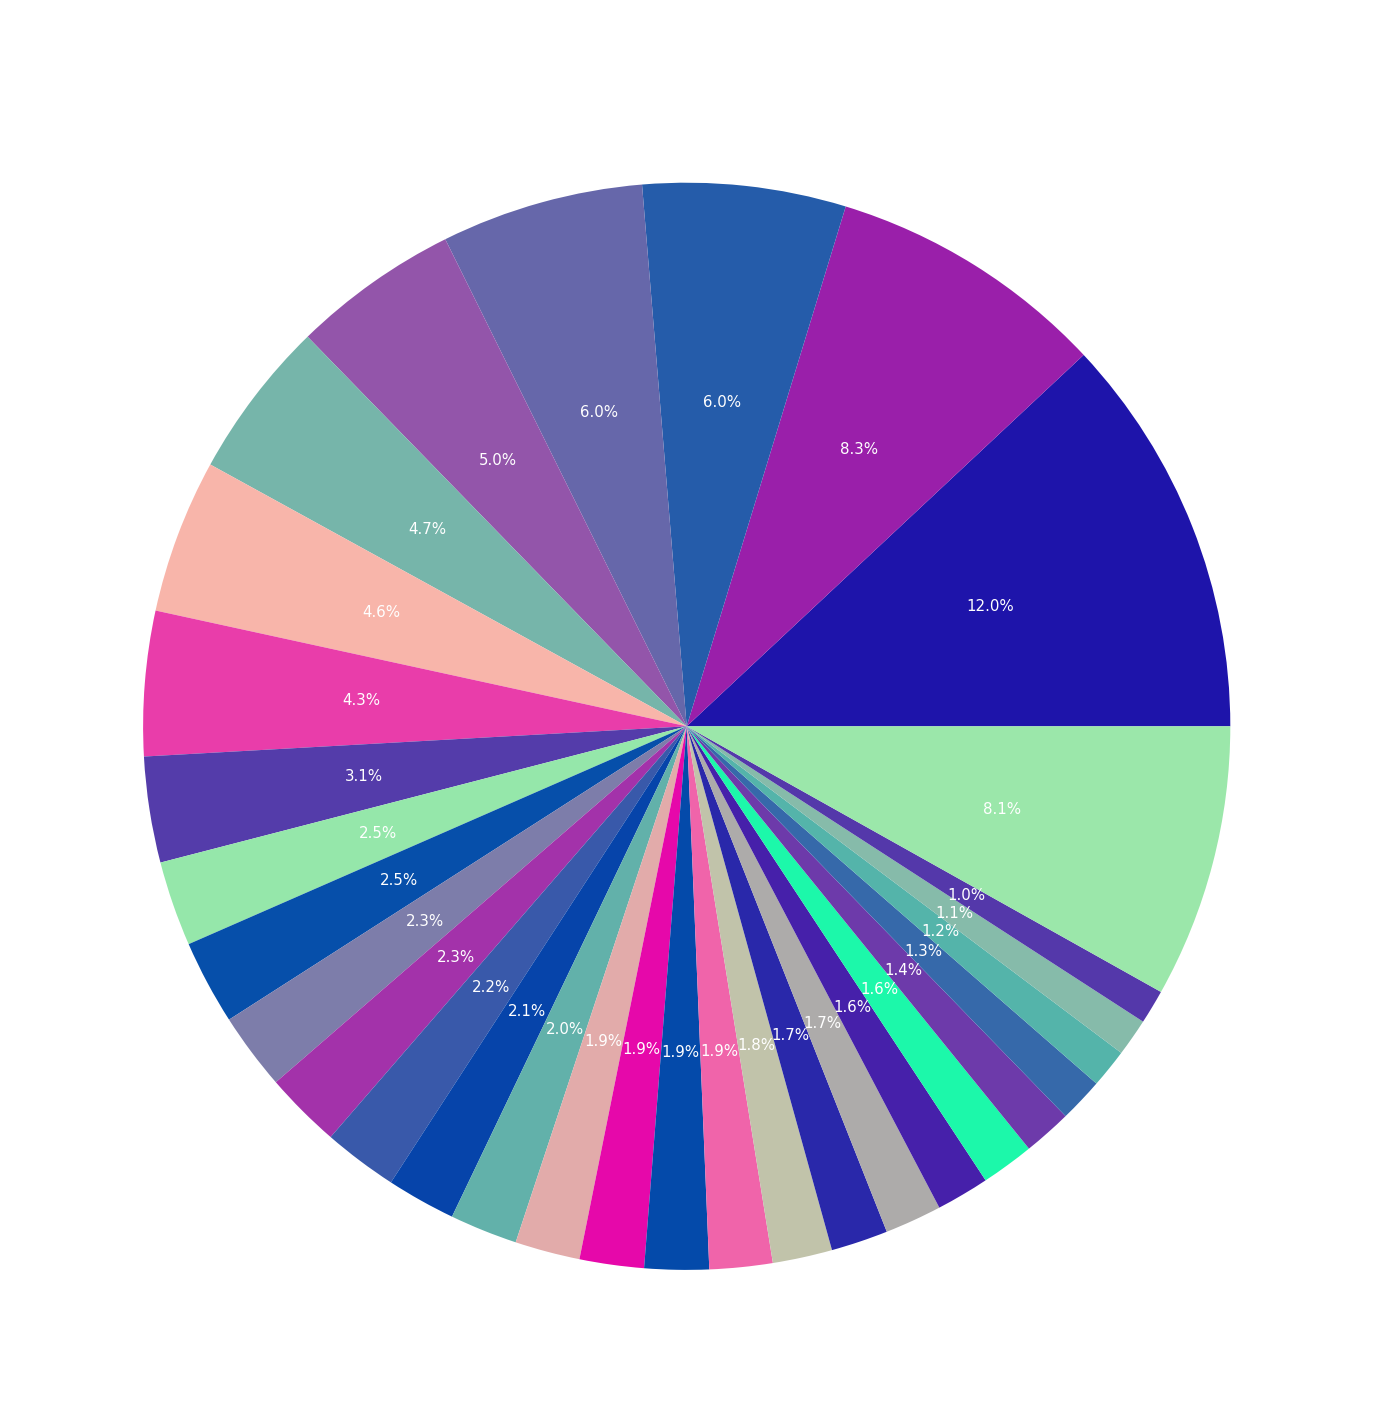

In [21]:
# Random Color function to make pie chart look cooler!
# From PythonPool.com https://www.pythonpool.com/python-random-color/
def random_color():
    import random
    hexadecimal = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(4)])
    hexadecimal += "AA"
    return hexadecimal

# Logic to add random colors to the colors array
colors = []
for i in range(len(state_freq_shortened)):
    colors.append(random_color())

# pie(numbers, states, colors, text_props, percentages, shadow)
plt.pie(state_freq_shortened, labels=states_shortened, colors=colors, 
textprops={"fontsize": 15, "color": "white"}, autopct='%.1f%%')
plt.title("Big Foot Sightings by State", fontdict={"fontsize": 40, "color": "w"})
fig = plt.gcf()
fig.set_size_inches(25,25) # Makes pie chart larger

plt.show()

## Observation: 
* It seems like the state with the most recorded Big Foot sightings is Washington


### Lets anaylize what season Big Foot is most likely to appear in

In [17]:
# Getting season Data from Big Foot data file
season = bigfoot_DF["season"]

counted_seaons = Counter(season)
counted_seaons
print(counted_seaons.keys(), counted_seaons.values())

dict_keys(['Summer', 'Fall', 'Spring', 'Winter', 'Unknown']) dict_values([1867, 1492, 825, 745, 92])


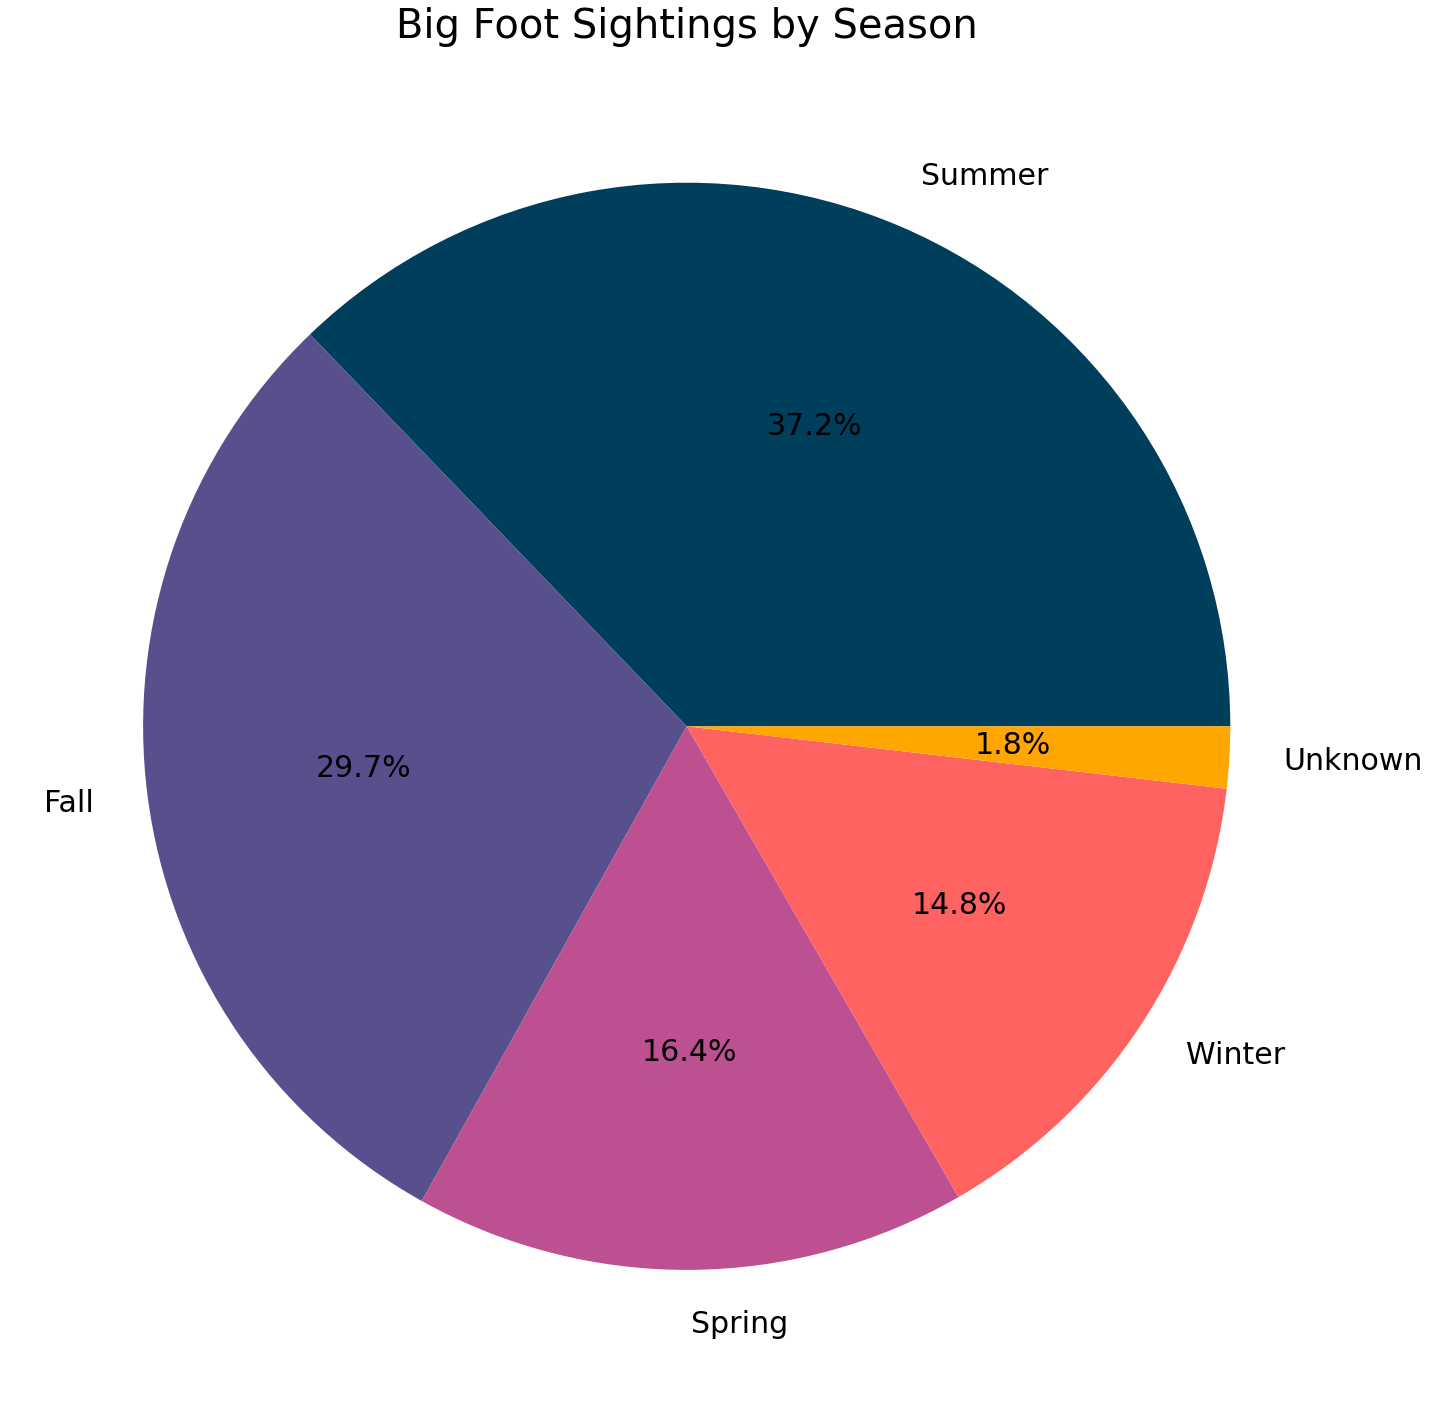

In [30]:
# Colors
color = ["#003F5C", "#58508D", "#BC5090", "#FF6361", "#FFA600"]

# Pie Chart for seasons
plt.pie(counted_seaons.values(), labels=counted_seaons.keys(), 
textprops={"fontsize": 30, "color": "black"}, autopct='%.1f%%', colors=color)
# Title
plt.title("Big Foot Sightings by Season", fontdict={"fontsize": 40})

fig = plt.gcf()
fig.set_size_inches(25,25) # Makes pie chart larger

plt.show()

### Observation
* It seems that people report sightings of Big Foot in the summer season

Question: What is the unknown 1.8 percent?

### Classes of Bigfoot Sightings
* Class A: I saw bigfoot
* Class B: I saw evidence of bigfoot
* Class C: Somebody told me they saw bigfoot

In [32]:
classification = bigfoot_DF["classification"]
classification = Counter(classification)
classification

Counter({'Class B': 2510, 'Class A': 2481, 'Class C': 30})

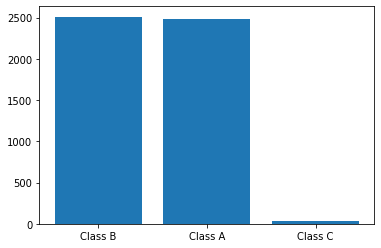

In [59]:
# Graphing Classification

class_strings = []
for entry in classification.keys():
    class_strings.append(entry)

plt.bar(class_strings, classification.values())
plt.show()

### Geohash


In [97]:
import math

geohash_data = bigfoot_DF["geohash"]

# Removing all the NaN occurances
filtered_geohashes = [x for x in geohash_data if not isinstance(x, float)]
print(filtered_geohashes[:3])

['drm5ucxrc0', '9y32z667yc', 'dpjbj6r280']


In [101]:
# Count occurnaces of Geohashes
counted_geohashes = Counter(filtered_geohashes)